# Описание проекта

Вместе с отделом маркетинга крупного интернет-магазина мы подготовили список гипотез для увеличения выручки.

**Цели исследования**
- Выполнить приоритизацию гипотез и выбрать наиболее перспективные идеи для тестирования.
- Провести анализ и сделать выводы о результатах A/B-теста. Принять решение по результам теста.

**Ход исследования**

Исследование пройдёт в два этапа.

- В первой части проекта выполним приоритизацию гипотез методами ICE и RICE.
- Во второй части проекта проведём анализ результатов A/B-теста и примем решение, следует ли зафиксировать победу одной из групп или отсутствие различий между группами, либо следует продолжить тест.

Загрузим библиотеки

In [1]:
#загружаем библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
import seaborn as sns
sns.set_style('white')

# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

%matplotlib inline

In [2]:
#настроим вывод так чтобы:
#текст в ячейке отображался полностью вне зависимости от длины (пригодится, чтобы посмотреть полное описание гипотез)
pd.set_option('display.max_colwidth', None)
#числа отображались с двумя знаками после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

## Приоритизация гипотез

### Определение приоритета методом ICE

Считаем наш список гипотез из файла в датафрейм `hypothesis`.

In [3]:
try:
    hypothesis = pd.read_csv('C:\\Users\\alexv\\Downloads\\hypothesis.csv')  
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

Выведем гипотезы на экран.

In [4]:
#выведем список гипотез
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Посчитаем оценку ICE и выведем список гипотез по убыванию значения ICE.

In [5]:
#рассчитаем ICE
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

#выведем гипотезы по убыванию ICE
display(hypothesis.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Наибольшее количество баллов по методу ICE набрали гипотезы с номерами 8, 0 и 7. Эти гипотезы имеют большие значения "влияния" и "уверенности" при средних значениях "затрат" на реализацию.


### Определение приоритета методом RICE

Посчитаем RICE для гипотез и выведем их список по убыванию показателя RICE.

In [6]:
#добавляем колонку с оценкой RICE
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

#выводим список гипотез с сортировкой по убыванию RICE
display(hypothesis.sort_values(by='RICE', ascending=False))


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


Гипотезы 0 и 7 остались в тройке лидеров, а гипотеза 8, которая была лидером по методу ICE, откатилась на пятое место. Так произошло, потому что у гипотезы 8 наименьший охват пользователей. Гипотеза с номером 7 наборот, имеет наибольший охват (Reach=10), что с учетом остальных показателей позволило ей занять первое место и лидировать с большим отрывом от остальных. Также в тройку лидеров вошла гипотеза с номером 2, у которой показатель Reach равен 8.

## Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Считаем информацию из файлов в датафреймы `orders` и`visitors`.

In [7]:
#получаем данные о заказах
try:
    orders = pd.read_csv('orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
    
#получаем данные о посетителях
try:
    visitors = pd.read_csv('visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

Посмотрим сведения о заказах.

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Пустые значения отсутствуют. 
Выведем первые пять строк.

In [9]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Переведём значения в столце date в формат даты.

In [10]:
#меняем тип данных в столбце date
orders['date'] = pd.to_datetime(orders['date'])

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Посмотрим общую информацию и первые пять строк с данным о количестве посещений.

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Меняем тип данных в столбце `date`.

In [15]:
#меняем тип данных в столбце date
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


На всякий случай проверим наличие полных дубликатов в данных о заказах и посетителях.

In [17]:
print(f"Количество дубликатов в данных о заказах: {orders.duplicated().sum()}")
print(f"Количество дубликатов в данных о посетителях: {visitors.duplicated().sum()}")

Количество дубликатов в данных о заказах: 0
Количество дубликатов в данных о посетителях: 0


**Проверим, корректно ли учитывались пользователи по своим группам.**

Вынесем информацию о заказах в разрезе групп A и B в отдельные датафреймы `orders_A` и `orders_B`. 

In [18]:
orders_A = orders[orders['group']=='A'] 
orders_B = orders[orders['group']=='B']
print('Количество клиентов, сделавших хотя бы один заказ, в группе А: {}'.format(orders_A['visitorId'].nunique()))
print('Количество клиентов, сделавших хотя бы один заказ, в группе B: {}'.format(orders_B['visitorId'].nunique()))

Количество клиентов, сделавших хотя бы один заказ, в группе А: 503
Количество клиентов, сделавших хотя бы один заказ, в группе B: 586


Проверим, нет ли случаев, когда один и тот же посетитель, учтен в разных группах.

Выполним merge `orders_A` и `orders_B` на основе значения поля `visitorId`. Так как по умолчанию функция `merge`производит внутреннее соединение (`'inner'`), то в результирующий объект попадут посетители, присутствующие в обеих группах. 

In [19]:
visitors_AB = orders_A.merge(orders_B, on='visitorId', suffixes=('_A', '_B')).sort_values(by='visitorId')

In [20]:
visitors_AB.head()

,transactionId_A,visitorId,date_A,revenue_A,group_A,transactionId_B,date_B,revenue_B,group_B
149,4293855558,8300375,2019-08-07,1790,A,3679129301,2019-08-01,10510,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B


Обнаружили, что существуют посетители, которые присутствуют в обеих группах.

Посчитаем, сколько таких пользователей.

In [21]:
visitors_AB_count = visitors_AB['visitorId'].nunique()
visitors_total = orders['visitorId'].nunique()
print(f"Общее количество уникальных пользователей: {visitors_total}")
print(f"Количество пользователей, учтённых в обеих группах: {visitors_AB_count}")
print("Процент пользователей, учтённых в обеих группах: {0:.2f}%".format((visitors_AB_count / visitors_total)*100))

Общее количество уникальных пользователей: 1031
Количество пользователей, учтённых в обеих группах: 58
Процент пользователей, учтённых в обеих группах: 5.63%


Посмотрим, сколько раз каждый пользователь из тех, что учтены в обеих группах, совершал заказы в рамках одной и другой группы.

In [22]:
(visitors_AB.groupby('visitorId')
    .agg({
        'transactionId_A' : 'nunique',
        'transactionId_B' : 'nunique'
    })
)

,transactionId_A,transactionId_B
visitorId,,
8300375,1,1
199603092,4,1
232979603,1,1
237748145,4,1
276558944,1,1
351125977,1,1
393266494,1,2
457167155,1,3
471551937,1,1


Итак мы обнаружили, что около 5% пользователей, участвовавших в эксперименте, переходили из группы в группу. Так как у нас нет информации о причинах такого поведения теста, то оставим все данные для анализа, но отметим, что в последующем требуется разобраться в причинах и внести корректировки в проведение теста, чтобы пользователь, отнесённый к определённой группе, оставался в рамках этой группы на протяжении всего эксперимента.

### Кумулятивная выручка по группам

Подготовим данные и построим график кумулятивной выручки по дням в разрезе групп.

Создадим датафрейм `datesGroup` с уникальными парами значений дата-группа из таблицы `orders`. 

In [23]:
datesGroup = orders[['date', 'group']].drop_duplicates()

In [24]:
datesGroup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 1150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ KB


In [25]:
datesGroup.head(5)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Объявим переменную ordersAggregated, содержащую:
- дату;
- группу A/B-теста;
- число уникальных заказов в группе теста по указанную дату включительно;
- число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
- суммарную выручку заказов в группе теста по указанную дату включительно.

In [26]:
#создаем датафрейм с накоплением данных на основе информации о заказах
ordersAggregated = datesGroup.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group']==x['group'])]
    .agg({
        'date' : 'max',
        'group' : 'max',
        'transactionId' : 'nunique',
        'visitorId' : 'nunique',
        'revenue' : 'sum'
    }), axis=1
).sort_values(by=['date', 'group'])

In [27]:
display(ordersAggregated.head(6))

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996


Объявим переменную visitorsAggregated, содержащую:
- дату;
- группу A/B-теста;
- количество уникальных посетителей в группе теста по указанную дату включительно.

In [28]:
visitorsAggregated = datesGroup.apply(
    lambda x: visitors[(visitors['date']<=x['date']) & (visitors['group']==x['group'])]
    .agg({
        'date' : 'max',
        'group' : 'max',
        'visitors' : 'sum'
    }), axis=1
).sort_values(by=['date', 'group'])

In [29]:
display(visitorsAggregated.head(6))

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803


 Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()

In [30]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])

In [31]:
cumulativeData.head(6)

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803


Переименуем столбцы.

In [32]:
cumulativeData.columns=['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [33]:
cumulativeData.head(4)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294


Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B

In [34]:
cumulativeRevenueA = cumulativeData.query('group=="A"')[['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData.query('group=="B"')[['date', 'revenue', 'orders']]

display(cumulativeRevenueA.head(5))

display(cumulativeRevenueB.head(5))

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


Построим графики кумулятивной выручки по дням по группам A и B.

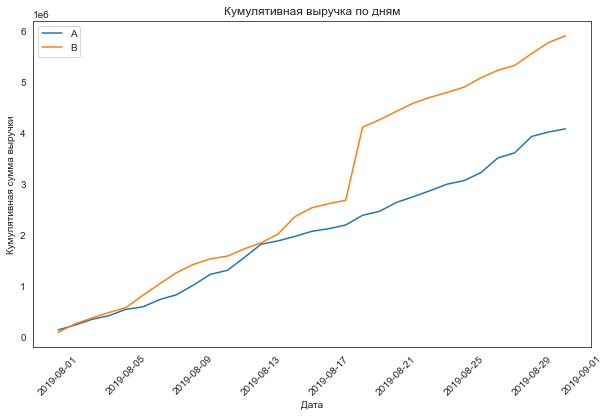

In [35]:
plt.figure(figsize=(10,6))
plt.title('Кумулятивная выручка по дням')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная сумма выручки')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Примерно до середины теста выручка по группе А немного превышала выручку по группе B, а затем резко оторвалась вперёд и продолжала лидировать. Видимо следует обратить внимание на аномально большие заказы, которые могли повлиять на результат, и удалить их при заключительном анализе.

### График кумулятивного среднего чека по группам

Для групп A и B построим графики кумулятивного среднего чека.

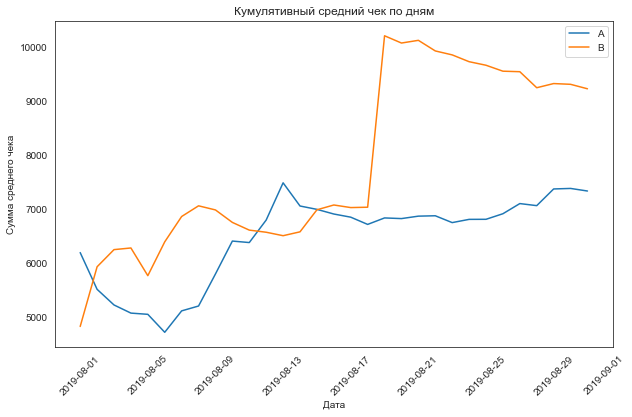

In [36]:
plt.figure(figsize=(10,6))
plt.title('Кумулятивный средний чек по дням')
plt.ylabel('Сумма среднего чека')
plt.xlabel('Дата')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)

plt.legend()
plt.show()

Кумулятивное значение среднего чека для группы `B` резко выросло в середине теста, а затем постепенно снижается. Требуется дополнительный анализ выбросов, которые могут искажать результаты.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия среднего чека.

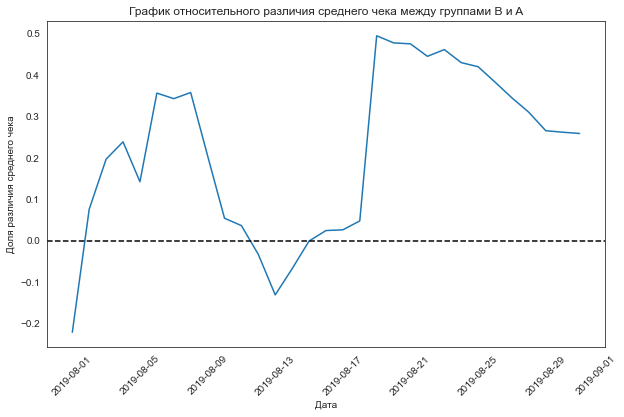

In [37]:
#объединяем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

#строим отношение средних чеков
plt.figure(figsize=(10,6))
plt.title('График относительного различия среднего чека между группами B и A')
plt.xlabel('Дата')
plt.ylabel('Доля различия среднего чека')

plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) /
         (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1 
        )
plt.xticks(rotation=45)
plt.axhline(y=0, linestyle='--', color='black')

plt.show()

На графике заментны резкие скачки различия между средними чеками групп B и A. Видимо есть влияние больших заказов, которые несколько раз сдвигали значение среднего чека и выводили вперед в относительном значении среднего чека то группу A, то группу B.  

### График кумулятивного среднего количества заказов на посетителя по группам

Посмотрим график кумулятивного среднего количества заказов на посетителя.

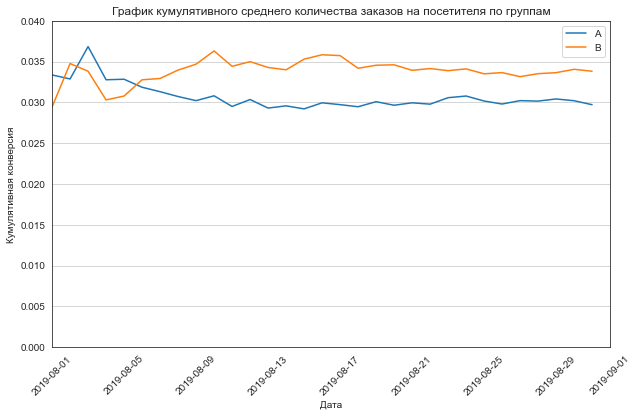

In [38]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,6))
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.04])
plt.grid(True, axis='y')
plt.xticks(rotation=45)

plt.show()

Через неделю после начала эксперимента конверсия группы `A` снизилась, а конверсия группы `B` подросла и вышла вперёд. На протяжении всего эксперимента конверсии в группах держались примерно на одном уровне, и конверсия в группе `B` стабильно превышает конверсию в группе `A`. 

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного различия кумулятивных конверсий:

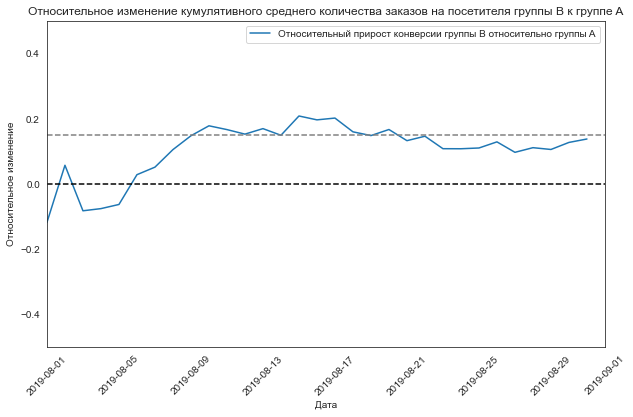

In [39]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 6))
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])
plt.xticks(rotation=45)

plt.show()

В начале теста группа `B` немного проигрывала группе `A`, затем вышла вперёд и на протяжении всего теста лидировала. Прирост конверсии держится около значения 0,15.

### Точечный график количества заказов по пользователям

Оценим количество заказов на одного пользователя.

Построим гистрограмму распределения количества заказов на одного пользователя.

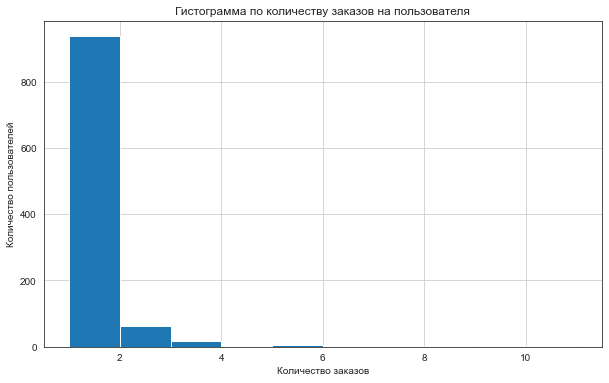

In [40]:
#Построим гистрограмму распределения количества заказов на одного пользователя
orders.groupby('visitorId').agg({'transactionId' : 'nunique'}).hist(figsize=(10,6))
plt.title('Гистограмма по количеству заказов на пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')

plt.show()

Большинство пользователей заказывали один раз, но также есть некоторая доля пользователей, заказывавших два-три раза, и очень мало тех, кто делал больше заказов.

Построим точечную диаграмму числа заказов на одного пользователя:

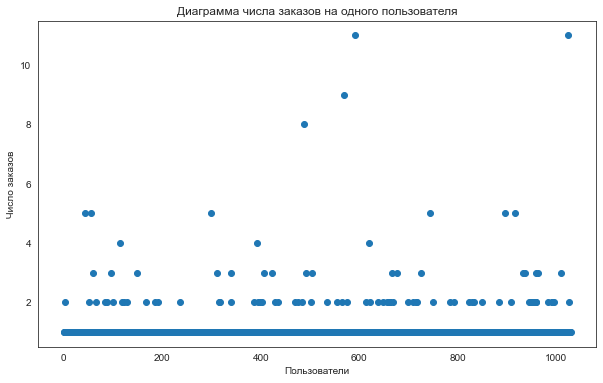

In [41]:
#Построим точечную диаграмму числа заказов на одного пользователя:
transByUsers = orders.groupby('visitorId').agg({'transactionId' : 'nunique'})
transByUsers.columns=(['orders'])
x_values = pd.Series(range(0, len(transByUsers)))

plt.figure(figsize=(10,6))
plt.title('Диаграмма числа заказов на одного пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Число заказов')

plt.scatter(x_values, transByUsers['orders'])
plt.show()

Достаточно много пользователей с 2-3 заказами. Их точная доля не ясна, поэтому непонятно, считать их аномалиями или нет. 

###  Граница для определения аномальных пользователей.

Посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя:

In [42]:
print(np.percentile(transByUsers['orders'],  [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли более чем два заказа, и не более 1% пользователей оформляли больше 4-х заказов. Можно выбрать 4 заказа как верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

### Точечный график стоимостей заказов

Для начала посмотрим гистограмму распределения стоимости заказов.

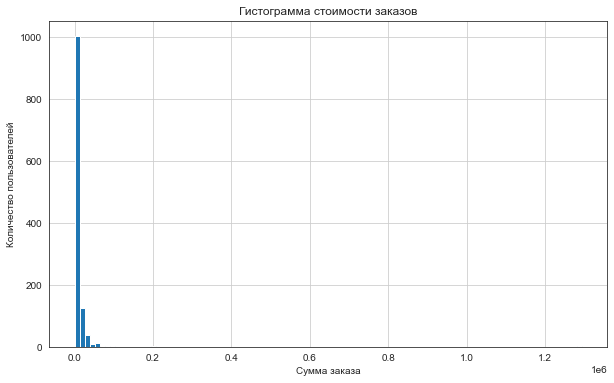

In [43]:
#Построим гистрограмму распределения стоимости заказов
orders['revenue'].hist(figsize=(10,6), bins=100)
plt.title('Гистограмма стоимости заказов')
plt.ylabel('Количество пользователей')
plt.xlabel('Сумма заказа')

plt.show()

На гистограмме сложно увидеть аномальные по сумме заказы и их количество.
Построим точечную диаграмму.

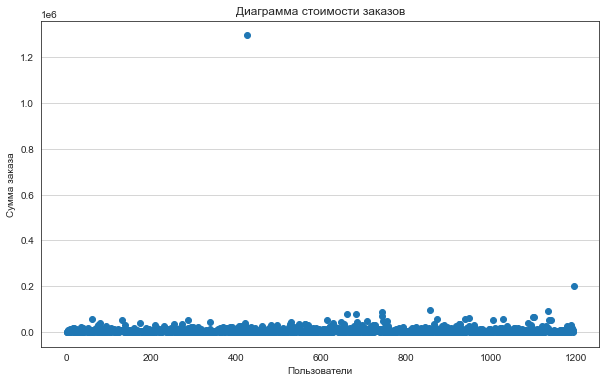

In [44]:
#Построим точечную диаграмму распределения стоимости заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,6))
plt.grid(True, axis='y')
plt.scatter(x_values, orders['revenue'])
plt.title('Диаграмма стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма заказа')

plt.show()

Заказы на суммы 200 тысяч и 1,2 миллиона выглядят аномально, а также не позволяют оценить на диаграмме другие суммы заказов, которые выбиваются из общей массы.    

Посмотрим на эту же диаграмму без учета аномально больших значений. Ограничим ось Y верхним значением  100000.

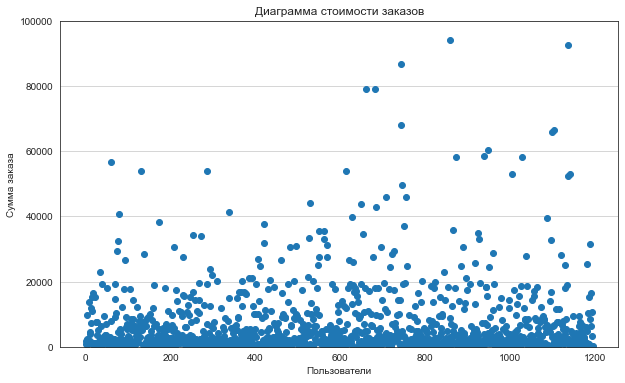

In [45]:
#Построим точечную диаграмму распределения стоимости заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,6))
plt.grid(True, axis='y')
plt.scatter(x_values, orders['revenue'])
plt.title('Диаграмма стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма заказа')
plt.ylim(0, 100000)

plt.show()

### Граница для определения аномальных заказов

Посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [46]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28000, и не больше, чем у 1% заказов - дороже 58233 рублей.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Проверим, есть ли статистически значимые различия между группами `A` и `B` по среднему количеству заказов на одного посетителя.

Сформулируем гипотезы:

```
H_0: Среднее количество заказов на посетителя из группы B = среднему количеству заказов на посетителя из группы A. Разницы между группами нет.
H_1: Среднее количество заказов на посетителя из группы B ≠ среднему количеству заказов на посетителя из группы A. Разница между группами есть.
alpha = 0.05
```

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами `['userId', 'orders']`, где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 

In [47]:
ordersByUsersA = (orders[orders['group']=='A']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId' : 'nunique'})
)
ordersByUsersA.columns=['userId', 'orders']
ordersByUsersA.head(5)

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [48]:
ordersByUsersB = (orders[orders['group']=='B']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId' : 'nunique'})
)
ordersByUsersB.columns=['userId', 'orders']
ordersByUsersB.head(5)

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [49]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]

Объявим переменные `sampleA` и `sampleB`, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. 

In [50]:
sampleA = pd.concat([ordersByUsersA['orders'],
                    pd.Series(0, index=np.arange(visitorsADaily['visitors'].sum() -
                    len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                    pd.Series(0, index=np.arange(visitorsBDaily['visitors'].sum() -
                    len(ordersByUsersB['orders'])), name='orders')], axis=0)

Выведем относительный прирост среднего количества заказов на пользователя группы B:

In [51]:
print(f'Относительное изменение среднего количества заказов на пользователя: {sampleB.mean() / sampleA.mean() - 1:.2%}')

Относительное изменение среднего количества заказов на пользователя: 13.81%


Посчитаем статистическую значимость различия среднего количества заказов по результатам теста методом Манна-Уитни.

In [52]:
#вызов метода для проверки гипотезы
result = stats.mannwhitneyu(sampleA, sampleB)

# зададим значение уровня значимости alpha
alpha=0.05

#вывод значения pvalue на экран
print(f"Значение p_value = {result.pvalue:.3f}")

#вывод результата проверки гипотезы
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Значение p_value = 0.017
Отвергаем нулевую гипотезу.


**Вывод**

На "сырых" данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу о равенстве среднего количества заказов на посетителя между группами в пользу альтернативной гипотезы. Относительный прирост среднего количества заказов на посетителя в группе `B` составил `13,8%`.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Найдём относительные различия в среднем чеке между группами:

In [53]:
print(f"Относительное изменение среднего чека пользователя: {orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1:.2%}")

Относительное изменение среднего чека пользователя: 25.87%


Проверим статистическую значимость различий в среднем чеке между группами `A` и `B`.

Сформулируем гипотезы:

```
H_0: Средний чек пользователя из группы B = среднему чеку пользователя из группы A. Различий в среднем чеке нет.
H_1: Средний чек пользователя из группы B ≠ среднему чеку пользователя из группы A. Различия в среднем чеке между группами есть.
alpha = 0.05
```

In [54]:
#вызов метода для проверки гипотезы
#передадим критерию mannwhitneyu() данные о выручке с заказов.
result = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'] , orders[orders['group']=='B']['revenue'])

# зададим значение уровня значимости alpha
alpha=0.05

#вывод значения pvalue на экран
print(f"Значение p_value = {result.pvalue:.3f}")

#вывод результата проверки гипотезы
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Значение p_value = 0.729
Не получилось отвергнуть нулевую гипотезу.


P-value намного больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек группы `B` на 25% выше среднего чека группы `A`.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Ранее мы определили, что менее 5% покупателей делают более двух заказов, и только 1% покупателей делают 4 и более заказов. 95-й и 99-й перцентили средних чеков равны 28000 и 58233 рублям.

Примем за аномальных пользователей тех, кто совершил более 3-х заказов или совершил заказ дороже 30000 рублей. Таким образом уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 30000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers

In [55]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders']>3]['userId'],
        ordersByUsersB[ordersByUsersB['orders']>3]['userId']
    ], axis=0
)

usersWithExpensiveOrders = orders[orders['revenue']>30000]['visitorId']

abnormalUsers = pd.concat(
    [usersWithManyOrders, usersWithExpensiveOrders], axis = 0
).drop_duplicates()

In [56]:
print(f"Количество аномальных пользователей: {abnormalUsers.shape[0]}")

Количество аномальных пользователей: 57


Подготовим выборки количества заказов по пользователям внутри групп.

In [57]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[~(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,
                 index=np.arange(
                     visitorsADaily['visitors'].sum() - len(ordersByUsersA['orders'])
                     - len(ordersByUsersA[(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'])
                 ),
                 name='orders'
        )
    ], axis=0    
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[~(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,
                 index=np.arange(
                     visitorsBDaily['visitors'].sum() - len(ordersByUsersB['orders'])
                     - len(ordersByUsersB[(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'])
                 ),
                 name='orders'
        )
    ], axis=0    
)

In [58]:
print(f'Относительное изменение среднего количества заказов на пользователя: {sampleBFiltered.mean() / sampleAFiltered.mean() - 1:.2%}')

Относительное изменение среднего количества заказов на пользователя: 14.77%


Применим статистический критерий Манна-Уитни к полученным выборкам.

In [59]:
#вызов метода для проверки гипотезы
result = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

# зададим значение уровня значимости alpha
alpha=0.05

#вывод значения pvalue на экран
print(f"Значение p_value = {result.pvalue:.3f}")

#вывод результата проверки гипотезы
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Значение p_value = 0.018
Отвергаем нулевую гипотезу.


По среднему количеству заказов результаты практически не изменились. Всё также фиксируем статистически значимые отличия между группами. Относительное изменение количества заказов составило `14,7%`.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Исключим из заказов данные по аномальным пользователям и проверим, изменятся ли на "очищенных" данных результаты по среднему чеку.

In [60]:
#исключаем данные по аномальным пользователям
ordersAFiltered = orders[(orders['group']=='A') & ~(orders['visitorId'].isin(abnormalUsers))]['revenue']
ordersBFiltered = orders[(orders['group']=='B') & ~(orders['visitorId'].isin(abnormalUsers))]['revenue']

In [61]:
#вызов метода для проверки гипотезы
#передадим критерию mannwhitneyu() очищенные данные о выручке с заказов.
result = stats.mannwhitneyu(ordersAFiltered , ordersBFiltered)

# зададим значение уровня значимости alpha
alpha=0.05

#вывод значения pvalue на экран
print(f"Значение p_value = {result.pvalue:.3f}")

#вывод результата проверки гипотезы
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Значение p_value = 0.958
Не получилось отвергнуть нулевую гипотезу.


In [62]:
print(f"Относительное изменение среднего чека пользователя: {ordersBFiltered.mean() / ordersAFiltered.mean() - 1:.2%}")

Относительное изменение среднего чека пользователя: -1.97%


На очищенных данных подросло значение p_value и существенно поменялось значение относительного изменения среднего чека. Теперь мы видим, что в среднем чеке практически нет разницы между группами. Можем с большой степенью уверенности сделать вывод, что между группами нет статиститически значимого различия по среднему размеру чека. 

### Графики на "очищенных" данных

Для наглядности построим графики на основе очищенных данных.

Исключим аномальных пользователей из списка заказов.

In [63]:
orders = orders[~(orders['visitorId'].isin(abnormalUsers))]

И построим те же графики, которые были в предыдущих разделах, но теперь без учёта аномальных значений по сумме заказа и количеству заказов.

In [64]:
#создаем датафрейм с накоплением данных на основе информации о заказах
ordersAggregated = datesGroup.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group']==x['group'])]
    .agg({
        'date' : 'max',
        'group' : 'max',
        'transactionId' : 'nunique',
        'visitorId' : 'nunique',
        'revenue' : 'sum'
    }), axis=1
).sort_values(by=['date', 'group'])

In [65]:
visitorsAggregated = datesGroup.apply(
    lambda x: visitors[(visitors['date']<=x['date']) & (visitors['group']==x['group'])]
    .agg({
        'date' : 'max',
        'group' : 'max',
        'visitors' : 'sum'
    }), axis=1
).sort_values(by=['date', 'group'])

In [66]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])

In [67]:
cumulativeData.columns=['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [68]:
cumulativeRevenueA = cumulativeData.query('group=="A"')[['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData.query('group=="B"')[['date', 'revenue', 'orders']]

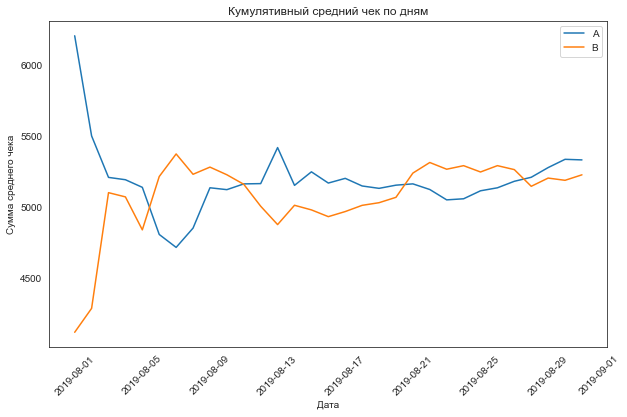

In [69]:
plt.figure(figsize=(10,6))
plt.title('Кумулятивный средний чек по дням')
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']
         / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] 
         / cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.legend()
plt.show()

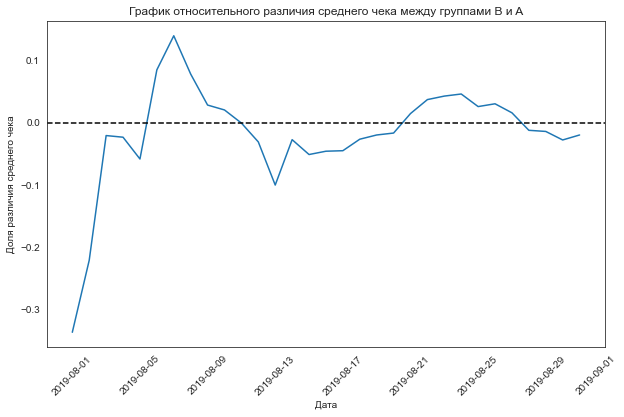

In [70]:
#объединяем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

#строим отношение средних чеков
plt.figure(figsize=(10,6))
plt.title('График относительного различия среднего чека между группами B и A')
plt.xlabel('Дата')
plt.ylabel('Доля различия среднего чека')

plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) /
         (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1 
        )
plt.axhline(y=0, linestyle='--', color='black')
plt.xticks(rotation=45)

plt.show()

Можно отметить, что различие в среднем чеке колеблется около нулевой отметки.

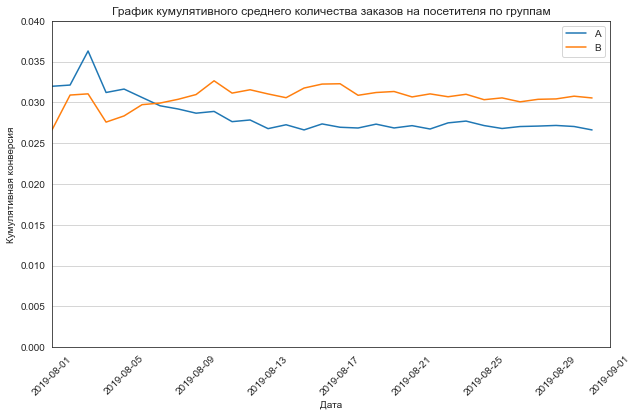

In [71]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,6))
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.04])
plt.grid(True, axis='y')
plt.xticks(rotation=45)

plt.show()

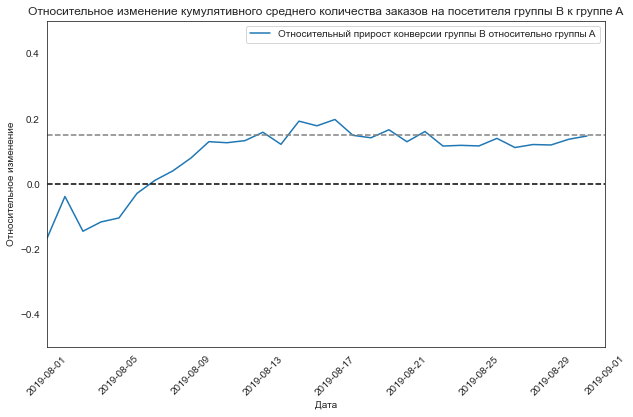

In [72]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 6))
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])
plt.xticks(rotation=45)

plt.show()

Графики на основе очищенных данных позволяют увидеть, что средний чек по группам не имеет значительных отлиичий, а среднее количество заказов в группе `А` стабильно выше, чем в группе `B`.

### Общий вывод

В первой части проекта мы выполнили приоритизацию гипотез методами ICE и RICE. Гипотеза, которая лидировала по методу ICE, после рассчёта оценки по методу RICE откатилась на пятое место, так как имела низкий охват посетителей, а на первое место по приоритету для проверки вышла гипотеза с наибольшим охватом, высокими оценками "влияния" и "уверенности" и умеренными затратами на реализацию.

Во второй части проекта был проведён анализ результатов A/B-теста.

Предварительный анализ показал, что некоторые пользователи в ходе теста попадали в обе группы, что некорректно и может приводить к искажению результатов. Можно дать рекомендации - найти и устранить причины, из-за которых клиенты учитывались в обеих группах, чтобы исключить подобные случаи в дальнейших исследованииях.

Результаты анализа A/B-теста показали:
- Есть статистически значимое различие по среднему количеству заказов на посетителя как по сырым данным, так и после фильтрации аномалий.
- Относительное изменение среднего количества заказов составило 13,8% по сырым данным и 14,7% по очищенным. По графику можно видеть, что результаты группы `B` лучше группы `A`.
- По сырым данным нет статистически значимого различия по среднему чеку, но при этом относительное измененение фиксировалось в районе 25%. После удаления аномалий относительное изменение составило около 1%. То есть отличия среднего чека по сырым данным были вызваны аномально большими суммами заказов. По очищенным данным нет статистически значимого различия по размеру среднего чека между группами. 

**По результатам теста** можно принять решение остановить тест и признать победу группы `B`.
